In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
df = pd.read_csv('12 (2) (Data).csv')
df.head()

,unix,date,symbol,open,high,low,close,Volume XRP,Volume USDT
0,1.640560e+12,12-27-2021,XRP-USDT,0.9200,0.9237,0.9200,0.9226,2384512.0,2.198450e+06
1,1.640480e+12,12-26-2021,XRP-USDT,0.9252,0.9334,0.9052,0.9200,163438501.0,1.499400e+08
2,1.640390e+12,12-25-2021,XRP-USDT,0.9114,0.9350,0.8981,0.9252,250074945.0,2.302303e+08
3,1.640300e+12,12-24-2021,XRP-USDT,0.9941,0.9966,0.8964,0.9115,567234092.0,5.377035e+08
4,1.640220e+12,12-23-2021,XRP-USDT,0.9538,1.0167,0.9372,0.9941,479436230.0,4.729372e+08


In [3]:
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns', '\n')
print(f'The dataset contains {df.isnull().sum().sum()} missing values', '\n')
print(f'The dataset contains {df.duplicated().sum()} duplicated rows', '\n')

The dataset contains 1334 rows and 9 columns 

The dataset contains 0 missing values 

The dataset contains 0 duplicated rows 



# Exploratory Data Analysis
* XRP refers to the native cryptocurrency of the Ripple network. It is the fourth largest cryptocurrency in the world by market capitalization.

In [5]:
print(f'The dataset contains {df["symbol"].nunique()} unique symbols', '\n')

The dataset contains 1 unique symbols 



In [6]:
print(f'The data runs from {df["date"].min()} to {df["date"].max()}')

The data runs from 1-1-2019 to 9-9-2021


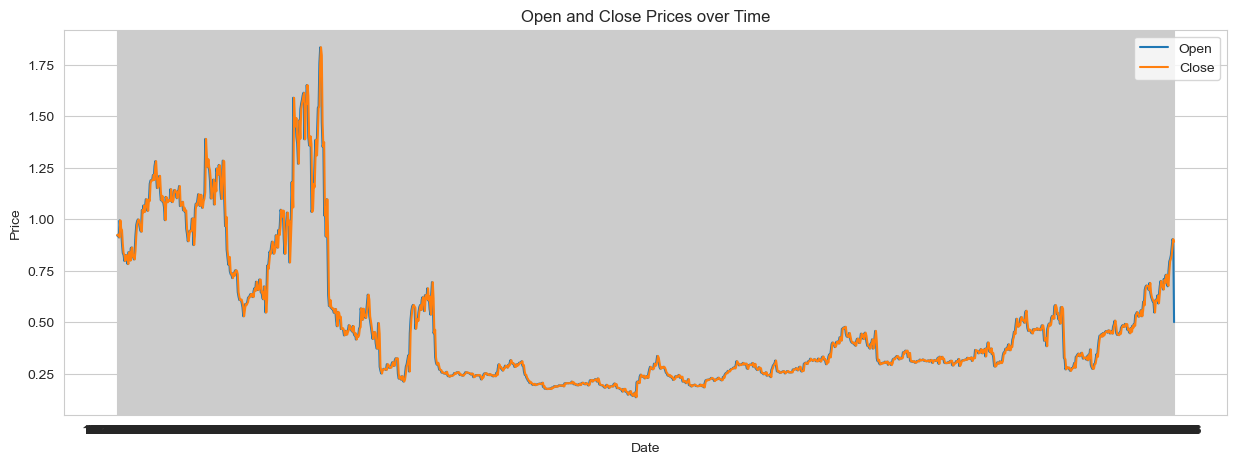

In [13]:
# Open and Close prices over time
def open_close_plot(df):
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(df['date'], df['open'], label='Open')
    ax.plot(df['date'], df['close'], label='Close')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.set_title('Open and Close Prices over Time')
    ax.legend()
    plt.show();

open_close_plot(df)

In [14]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month

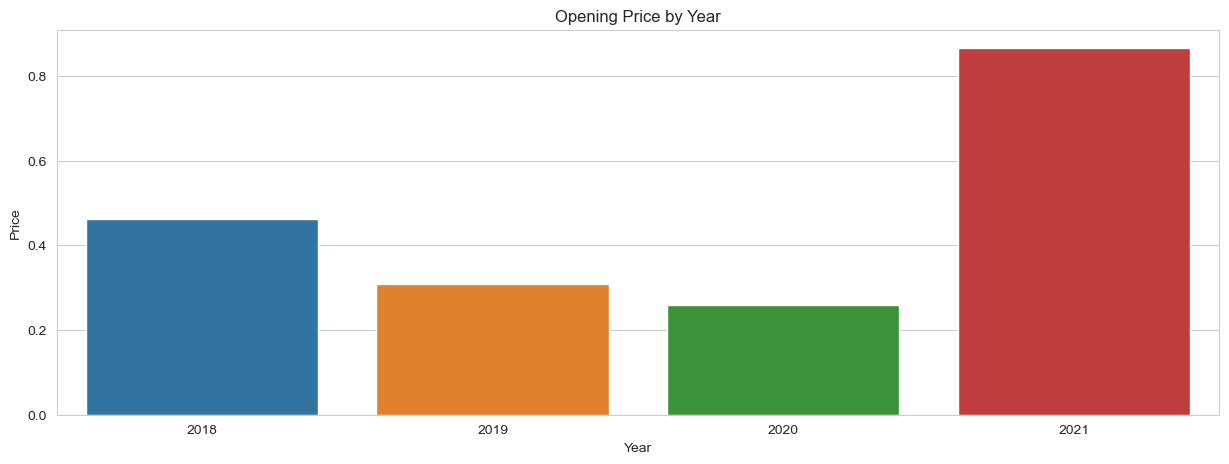

In [15]:
# Opening price by year (stacked)
# Stacked bar chart
def open_price_by_year(df):
    fig, ax = plt.subplots(figsize=(15, 5))
    sns.barplot(x='year', y='open', data=df, ci=None)
    ax.set_xlabel('Year')
    ax.set_ylabel('Price')
    ax.set_title('Opening Price by Year')
    plt.show();

open_price_by_year(df)

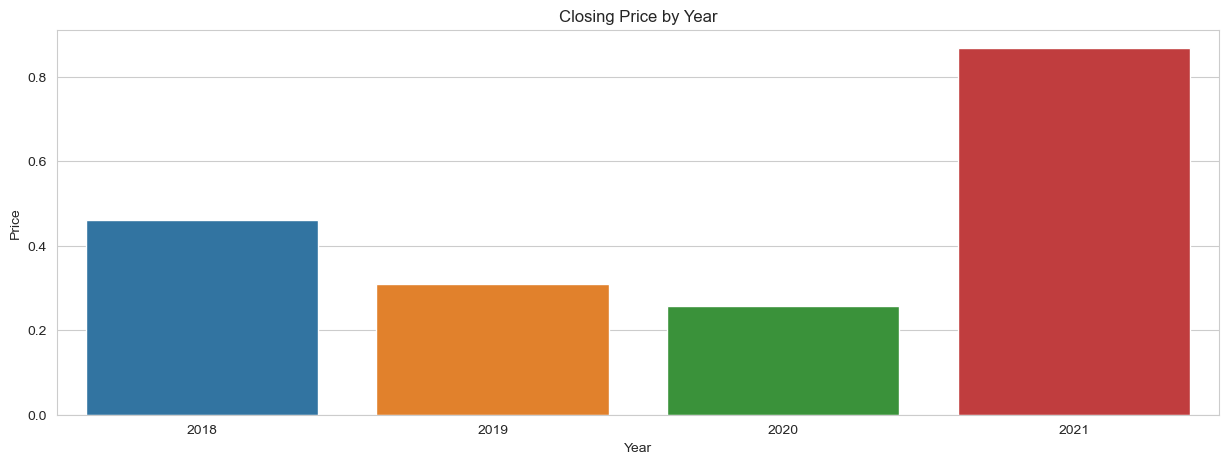

In [16]:
# Closing price by year (stacked)
# Stacked bar chart
def close_price_by_year(df):
    fig, ax = plt.subplots(figsize=(15, 5))
    sns.barplot(x='year', y='close', data=df, ci=None)
    ax.set_xlabel('Year')
    ax.set_ylabel('Price')
    ax.set_title('Closing Price by Year')
    plt.show();

close_price_by_year(df)

<Axes: xlabel='Volume XRP', ylabel='Volume USDT'>

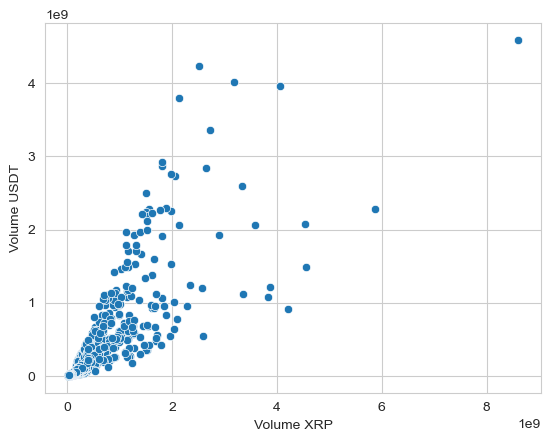

In [19]:
# Ploting volume xrp and volume usd
sns.scatterplot(x='Volume XRP', y='Volume USDT', data=df)

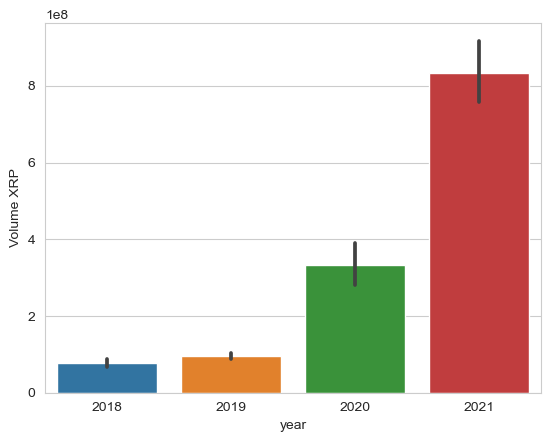

In [20]:
# Ploting volume xrp and volume usd
sns.barplot(x='year', y='Volume XRP', data=df);

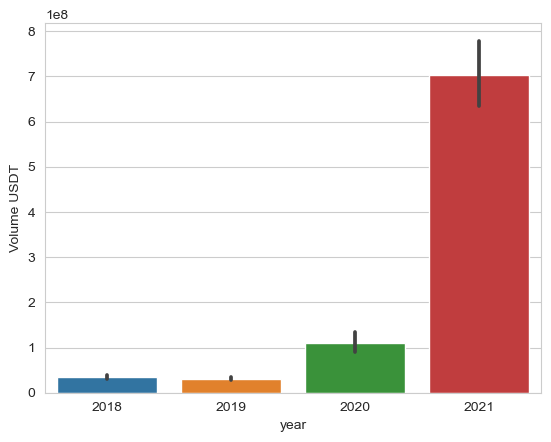

In [21]:
sns.barplot(x='year', y='Volume USDT', data=df);

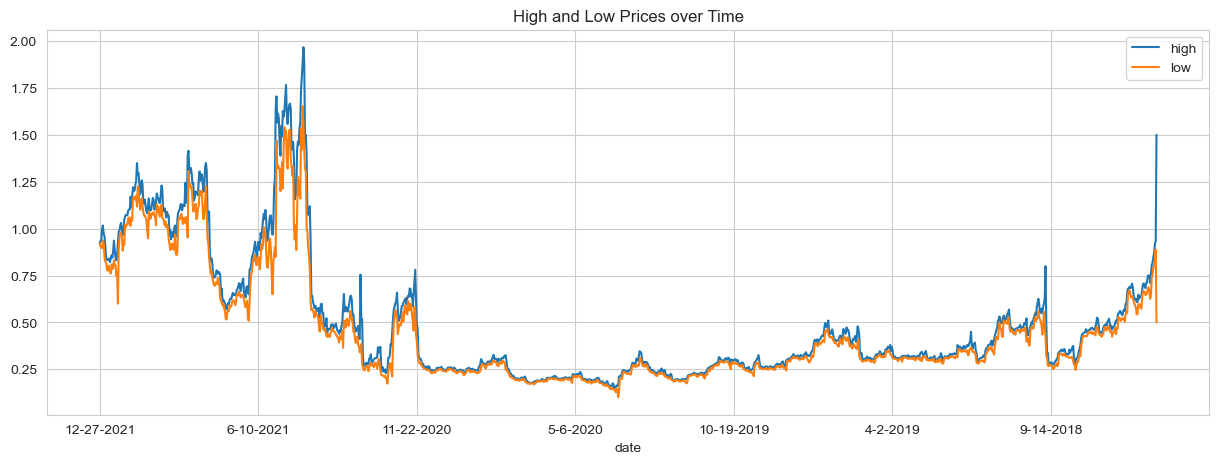

In [22]:
# High and Low prices over time
high_low = df[['date', 'high', 'low']]

high_low.set_index('date').plot(figsize=(15, 5), title='High and Low Prices over Time');

<Axes: ylabel='high'>

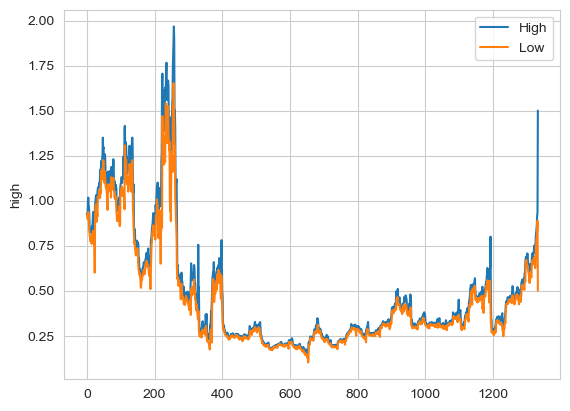

In [24]:
x = high_low.index # this is the index of the dataframe ie date
sns.lineplot(x=x, y='high', data=high_low, label='High')

<Axes: ylabel='low'>

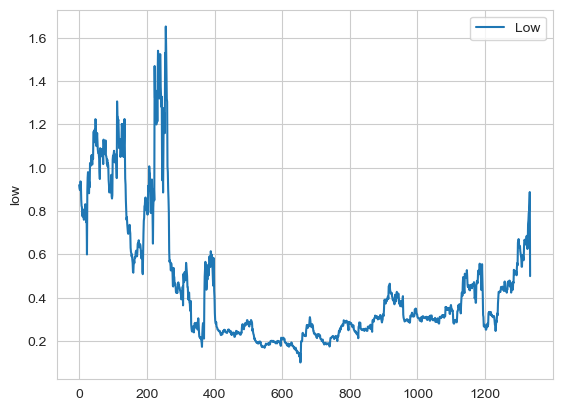

In [25]:
sns.lineplot(x=x, y='low', data=high_low, label='Low')

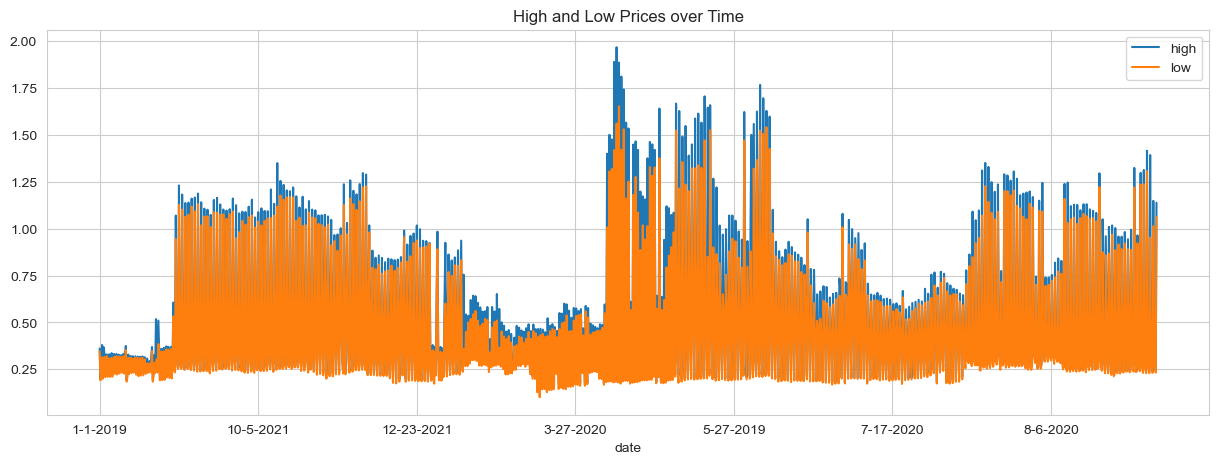

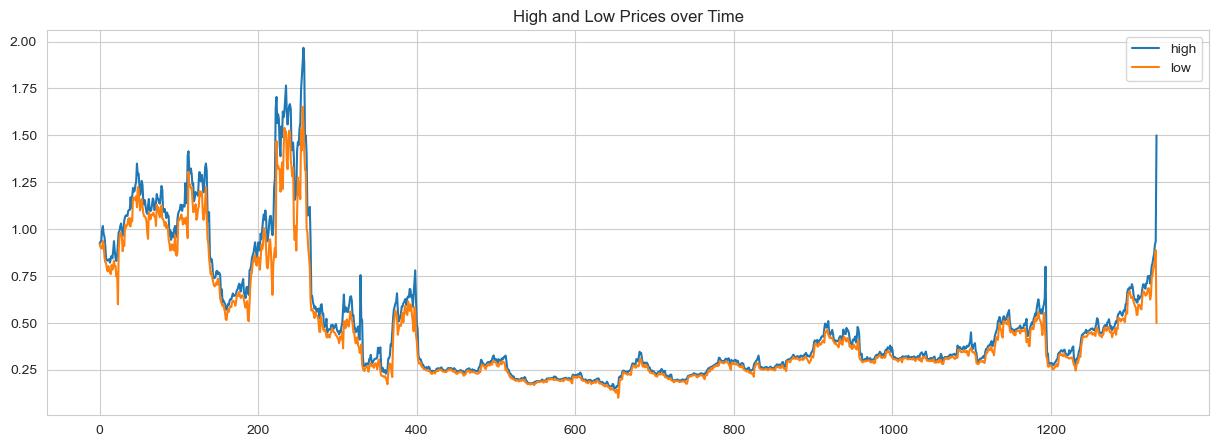

In [29]:
high_low.groupby('date').mean().plot(figsize=(15, 5), title='High and Low Prices over Time');
high_low.plot(figsize=(15, 5), title='High and Low Prices over Time');


<Axes: ylabel='high'>

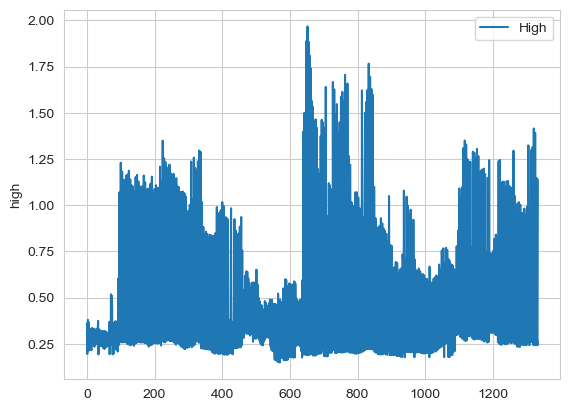

In [30]:
sns.lineplot(x=x, y='high', data=high_low.groupby('date').mean(), label='High')

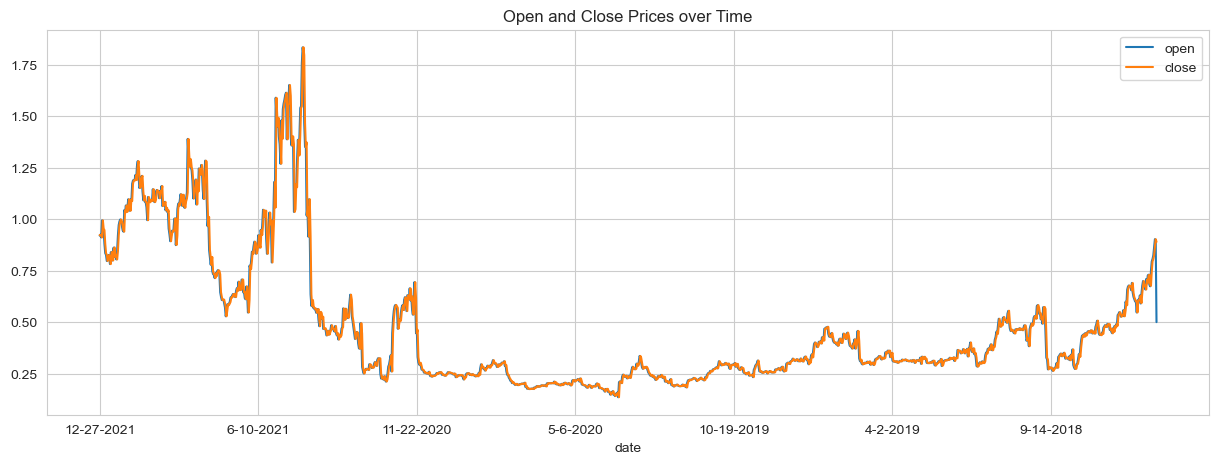

In [31]:
open_close = df[['date', 'open', 'close']]

open_close.set_index('date').plot(figsize=(15, 5), title='Open and Close Prices over Time');

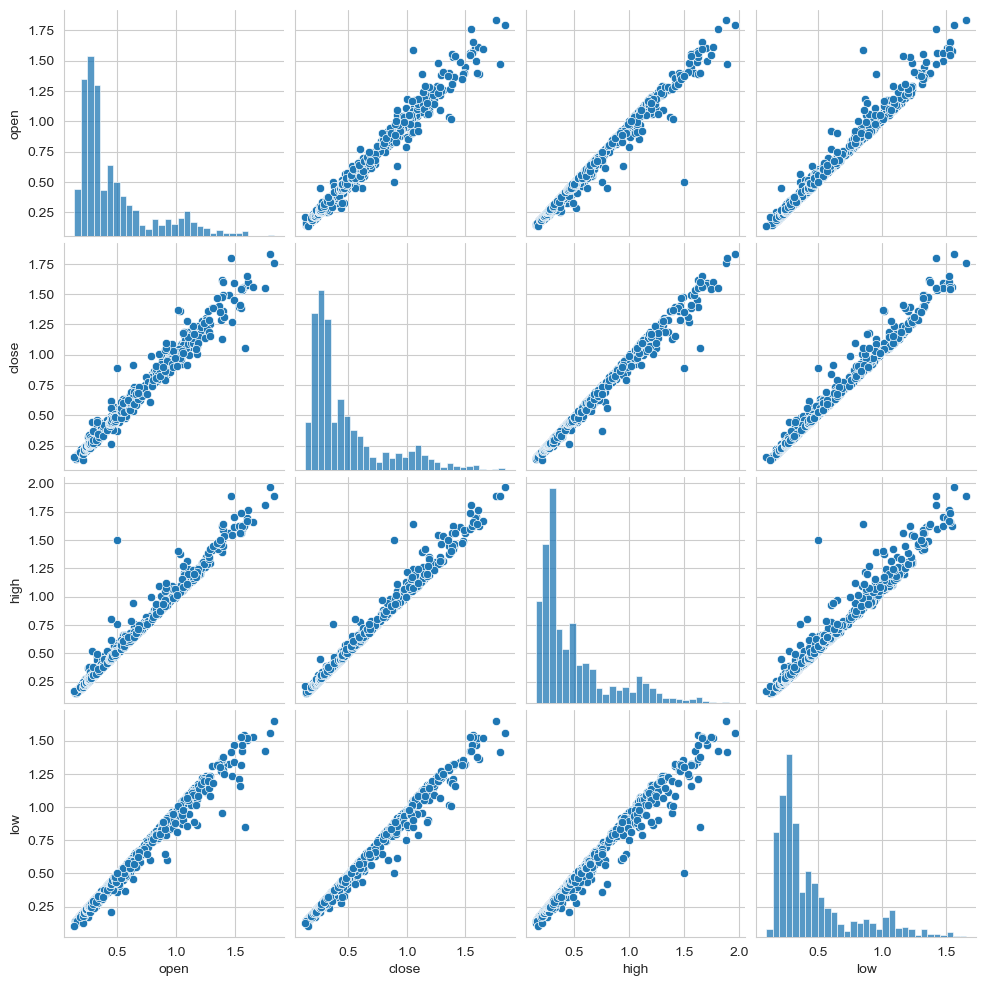

In [34]:
sns.pairplot(df[['open', 'close', 'high', 'low']]);

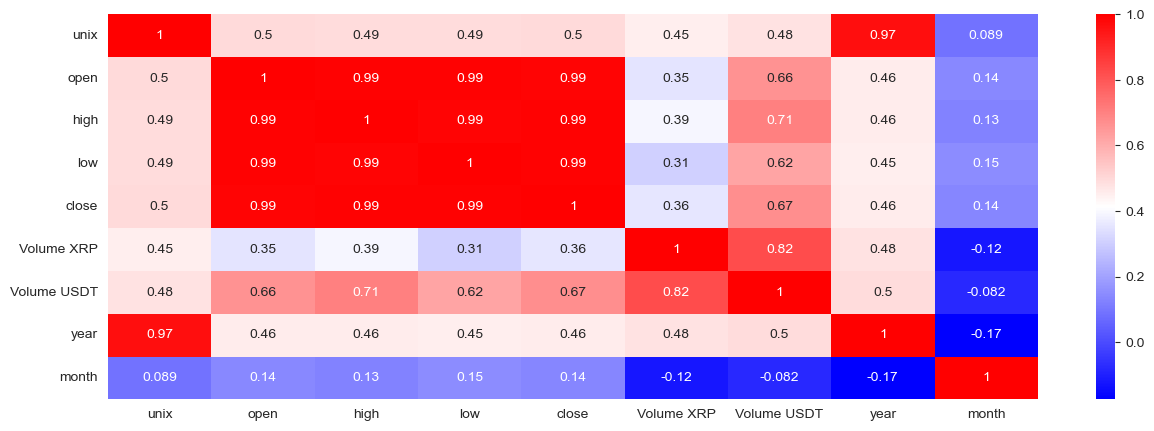

In [35]:
corr = df.corr()

plt.figure(figsize=(15, 5))
sns.heatmap(corr, annot=True, cmap='bwr');

In [36]:
corr['close'].sort_values(ascending=False).head(10)

close          1.000000
high           0.994491
low            0.994198
open           0.990702
Volume USDT    0.671461
unix           0.498173
year           0.457874
Volume XRP     0.355914
month          0.135441
Name: close, dtype: float64

In [37]:
high_corr_features = corr.index[abs(corr['close']) > 0.5]
high_corr_features = high_corr_features.drop('close')
high_corr_features

Index(['open', 'high', 'low', 'Volume USDT'], dtype='object')

# Modelling 

Mean squared error: 0.00
Coefficient of determination: 0.99


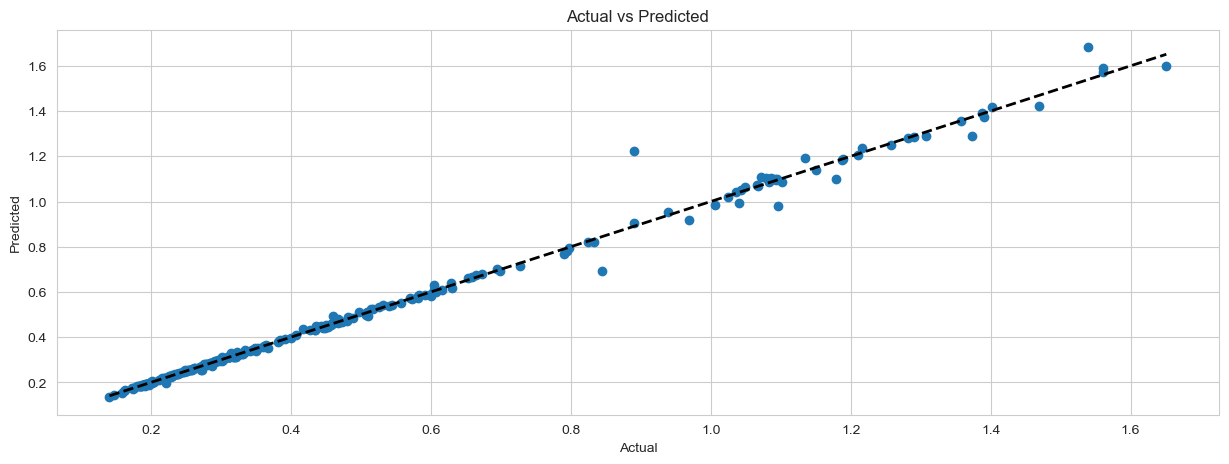

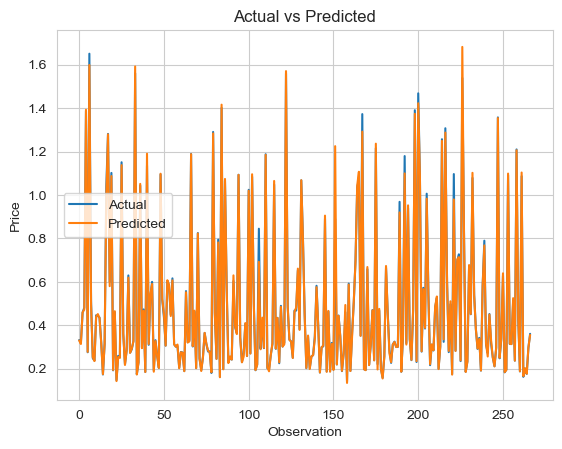

In [39]:
X = df[high_corr_features]
y = df['close']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

plt.figure(figsize=(15, 5))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show();

plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Observation')
plt.ylabel('Price')
plt.title('Actual vs Predicted')
plt.legend()
plt.show();

Mean squared error: 0.00
Coefficient of determination: 1.00


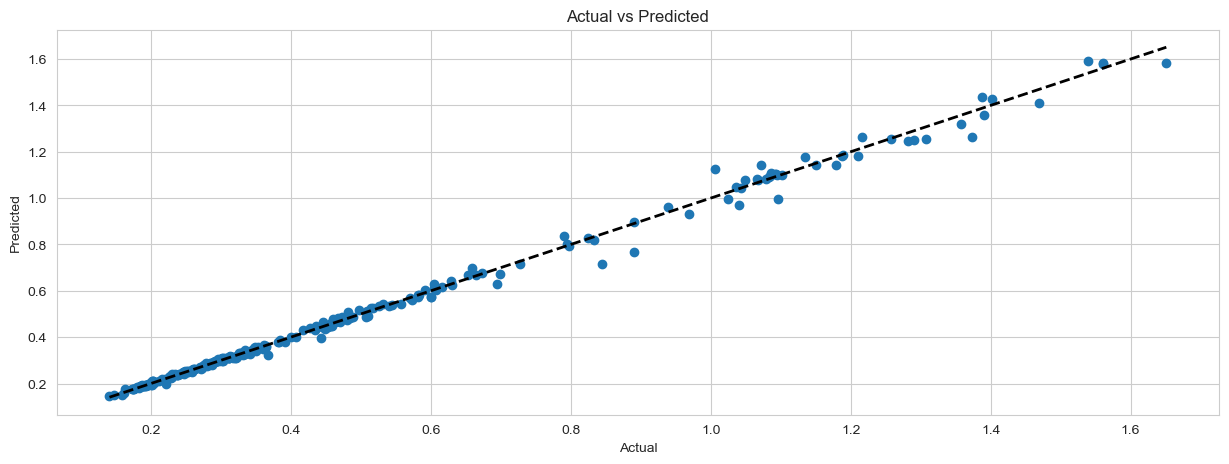

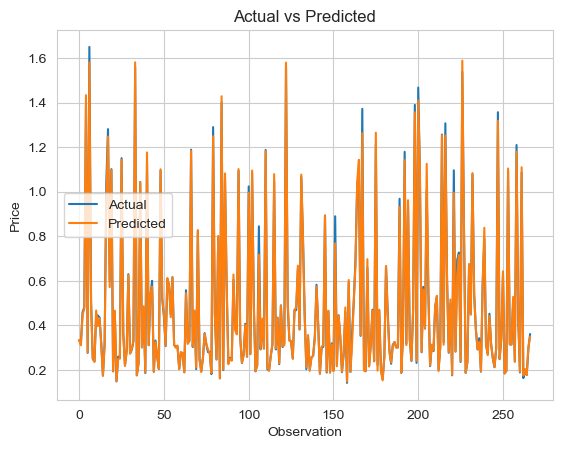

In [40]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_y_pred = rf.predict(X_test)

print('Mean squared error: %.2f' % mean_squared_error(y_test, rf_y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, rf_y_pred))

plt.figure(figsize=(15, 5))
plt.scatter(y_test, rf_y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show();

plt.plot(y_test.values, label='Actual')
plt.plot(rf_y_pred, label='Predicted')
plt.xlabel('Observation')
plt.ylabel('Price')
plt.title('Actual vs Predicted')
plt.legend()
plt.show();

# Time Series Analysis

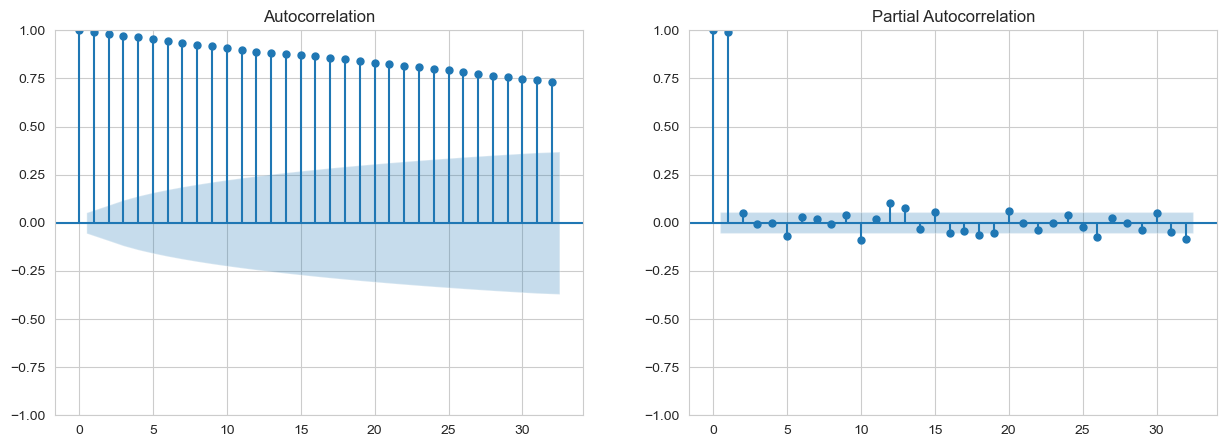

In [42]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
def plot_acf_pacf(df):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    plot_acf(df, ax=ax[0])
    plot_pacf(df, ax=ax[1])
    plt.show();

plot_acf_pacf(df['close'])

In [43]:
df.head()

,unix,date,symbol,open,high,low,close,Volume XRP,Volume USDT,year,month
0,1.640560e+12,12-27-2021,XRP-USDT,0.9200,0.9237,0.9200,0.9226,2384512.0,2.198450e+06,2021,12
1,1.640480e+12,12-26-2021,XRP-USDT,0.9252,0.9334,0.9052,0.9200,163438501.0,1.499400e+08,2021,12
2,1.640390e+12,12-25-2021,XRP-USDT,0.9114,0.9350,0.8981,0.9252,250074945.0,2.302303e+08,2021,12
3,1.640300e+12,12-24-2021,XRP-USDT,0.9941,0.9966,0.8964,0.9115,567234092.0,5.377035e+08,2021,12
4,1.640220e+12,12-23-2021,XRP-USDT,0.9538,1.0167,0.9372,0.9941,479436230.0,4.729372e+08,2021,12


In [44]:
# Convert unix time to datetime
df['unix'] = pd.to_datetime(df['unix'], unit='ms')
df.head()

,unix,date,symbol,open,high,low,close,Volume XRP,Volume USDT,year,month
0,2021-12-26 23:06:40,12-27-2021,XRP-USDT,0.9200,0.9237,0.9200,0.9226,2384512.0,2.198450e+06,2021,12
1,2021-12-26 00:53:20,12-26-2021,XRP-USDT,0.9252,0.9334,0.9052,0.9200,163438501.0,1.499400e+08,2021,12
2,2021-12-24 23:53:20,12-25-2021,XRP-USDT,0.9114,0.9350,0.8981,0.9252,250074945.0,2.302303e+08,2021,12
3,2021-12-23 22:53:20,12-24-2021,XRP-USDT,0.9941,0.9966,0.8964,0.9115,567234092.0,5.377035e+08,2021,12
4,2021-12-23 00:40:00,12-23-2021,XRP-USDT,0.9538,1.0167,0.9372,0.9941,479436230.0,4.729372e+08,2021,12


In [45]:
# Set index to unix
df.set_index('unix', inplace=True)
df.head()

,date,symbol,open,high,low,close,Volume XRP,Volume USDT,year,month
unix,,,,,,,,,,
2021-12-26 23:06:40,12-27-2021,XRP-USDT,0.9200,0.9237,0.9200,0.9226,2384512.0,2.198450e+06,2021,12
2021-12-26 00:53:20,12-26-2021,XRP-USDT,0.9252,0.9334,0.9052,0.9200,163438501.0,1.499400e+08,2021,12
2021-12-24 23:53:20,12-25-2021,XRP-USDT,0.9114,0.9350,0.8981,0.9252,250074945.0,2.302303e+08,2021,12
2021-12-23 22:53:20,12-24-2021,XRP-USDT,0.9941,0.9966,0.8964,0.9115,567234092.0,5.377035e+08,2021,12
2021-12-23 00:40:00,12-23-2021,XRP-USDT,0.9538,1.0167,0.9372,0.9941,479436230.0,4.729372e+08,2021,12


In [46]:
# Resample to daily data
df_daily = df.resample('D').mean()

df_daily.head()

,open,high,low,close,Volume XRP,Volume USDT,year,month
unix,,,,,,,,
2018-05-03,0.50000,1.50000,0.50000,0.889900,20890213.82,18946724.69,2018.0,5.0
2018-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-05,0.89630,0.92650,0.86287,0.883815,16409100.55,14639570.82,2018.0,5.0
2018-05-06,0.86482,0.86886,0.80000,0.824900,17303486.40,14192279.73,2018.0,5.0
2018-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


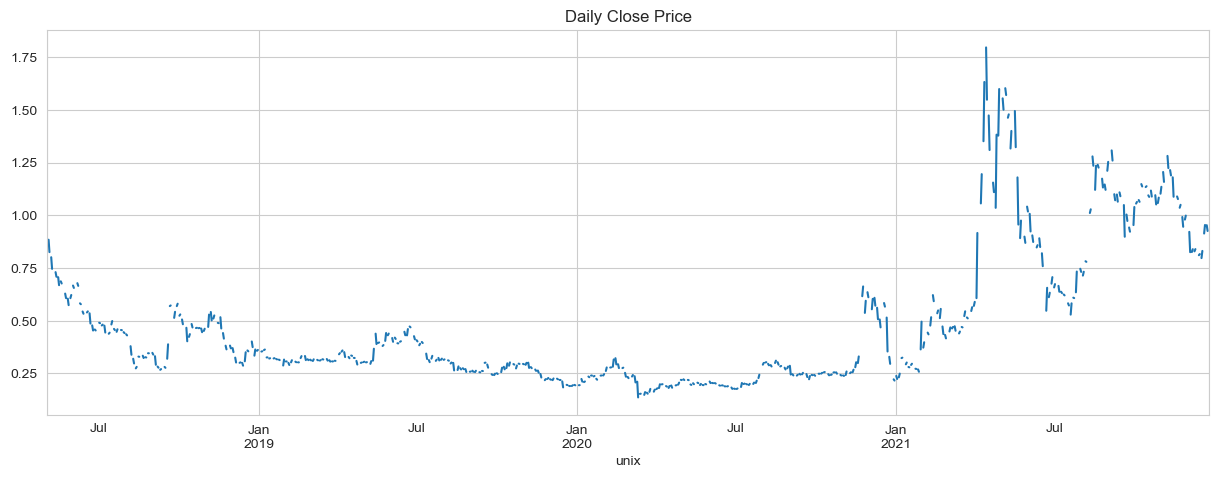

In [47]:
# Plot daily data
df_daily['close'].plot(figsize=(15, 5), title='Daily Close Price');

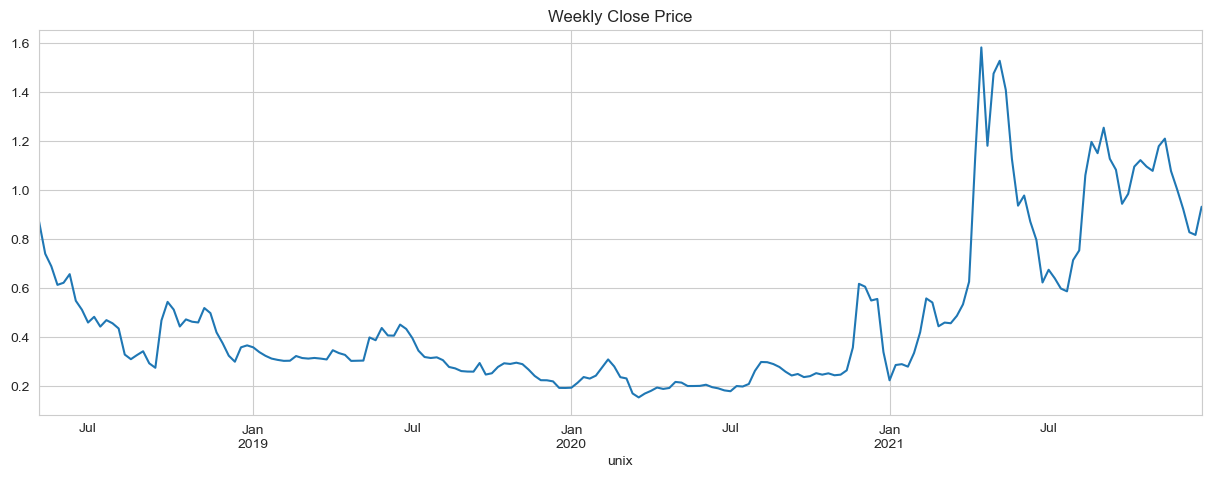

In [48]:
# Resample to weekly data
df_weekly = df.resample('W').mean()

df_weekly['close'].plot(figsize=(15, 5), title='Weekly Close Price');

In [50]:
# Test the stationarity of the data
from statsmodels.tsa.stattools import adfuller


## null hypothesis: the data is non-stationary ##

def adf_test(series, title=''):
    print('********************************************')
    print(f'Results of Dickey-Fuller Test: {title}')
    print('********************************************')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '# Lags Used', '# Observations']
    out = pd.Series(result[0:4], index=labels)
    for key, val in result[4].items():
        out[f'Critical Value ({key})'] = val
    print(out.to_string())
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis')
        print('Reject the null hypothesis')
        print('Data has no unit root and is stationary')
    else:
        print('Weak evidence against the null hypothesis')
        print('Fail to reject the null hypothesis')
        print('Data has a unit root and is non-stationary')

adf_test(df_daily['close'], title='Daily Close Price')

********************************************
Results of Dickey-Fuller Test: Daily Close Price
********************************************


ADF Test Statistic       -2.286061
p-value                   0.176503
# Lags Used              11.000000
# Observations          842.000000
Critical Value (1%)      -3.438140
Critical Value (5%)      -2.864979
Critical Value (10%)     -2.568601
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


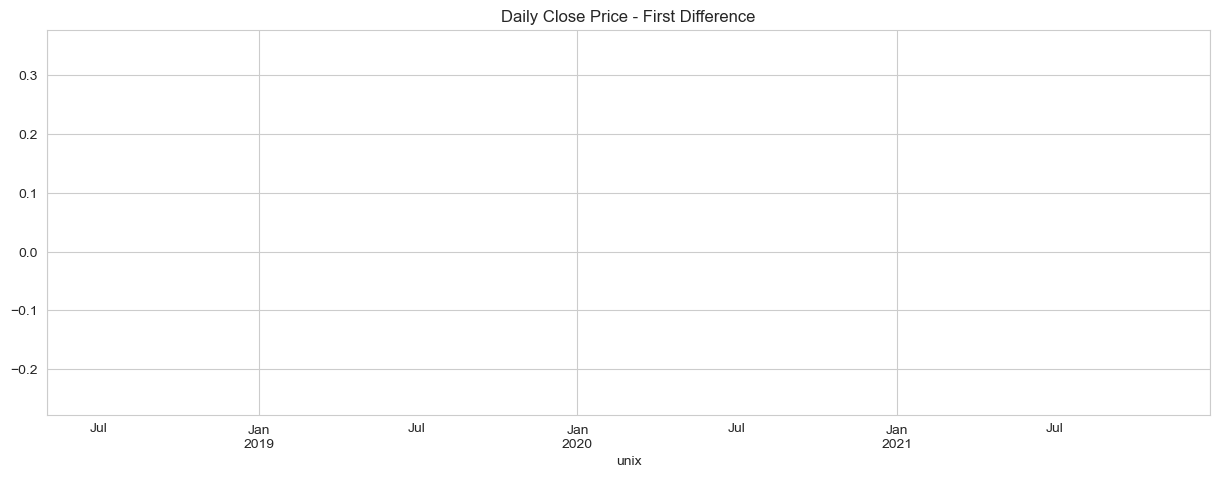

In [51]:
# Take the first difference
df_daily['close_diff'] = df_daily['close'] - df_daily['close'].shift(1)

df_daily['close_diff'].plot(figsize=(15, 5), title='Daily Close Price - First Difference');

In [52]:
# Test the stationarity of the data
adf_test(df_daily['close_diff'].dropna(), title='Daily Close Price - First Difference')

********************************************
Results of Dickey-Fuller Test: Daily Close Price - First Difference
********************************************
ADF Test Statistic     -6.537635e+00
p-value                 9.520466e-09
# Lags Used             1.200000e+01
# Observations          3.600000e+02
Critical Value (1%)    -3.448646e+00
Critical Value (5%)    -2.869602e+00
Critical Value (10%)   -2.571065e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


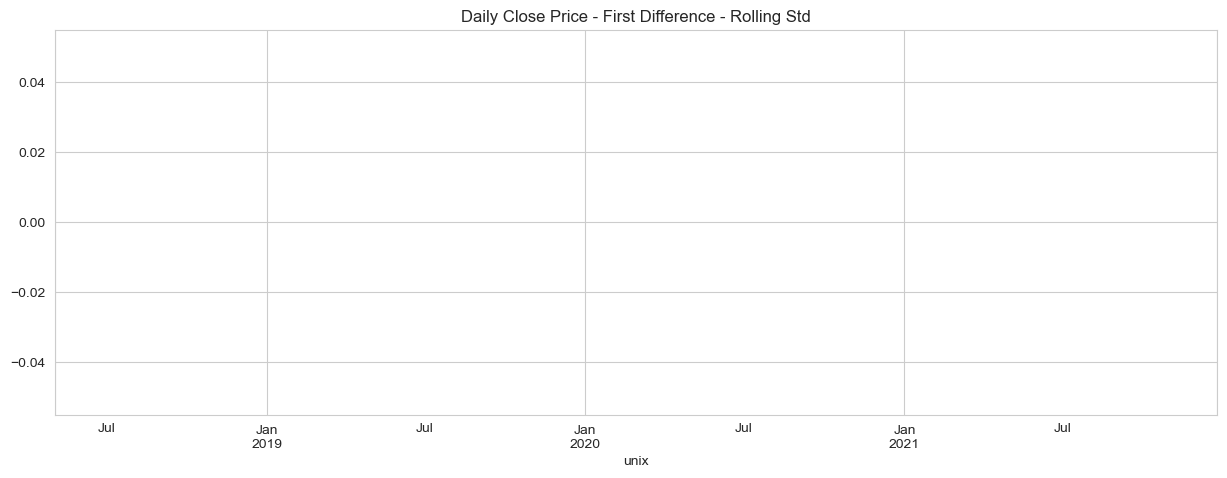

In [53]:
# Rolling mean and standard deviation
df_daily['close_diff'].rolling(7).mean().plot(figsize=(15, 5), title='Daily Close Price - First Difference - Rolling Mean')
df_daily['close_diff'].rolling(7).std().plot(figsize=(15, 5), title='Daily Close Price - First Difference - Rolling Std');

<Axes: title={'center': 'Daily Close Price - First Difference - Rolling Mean'}, xlabel='unix'>

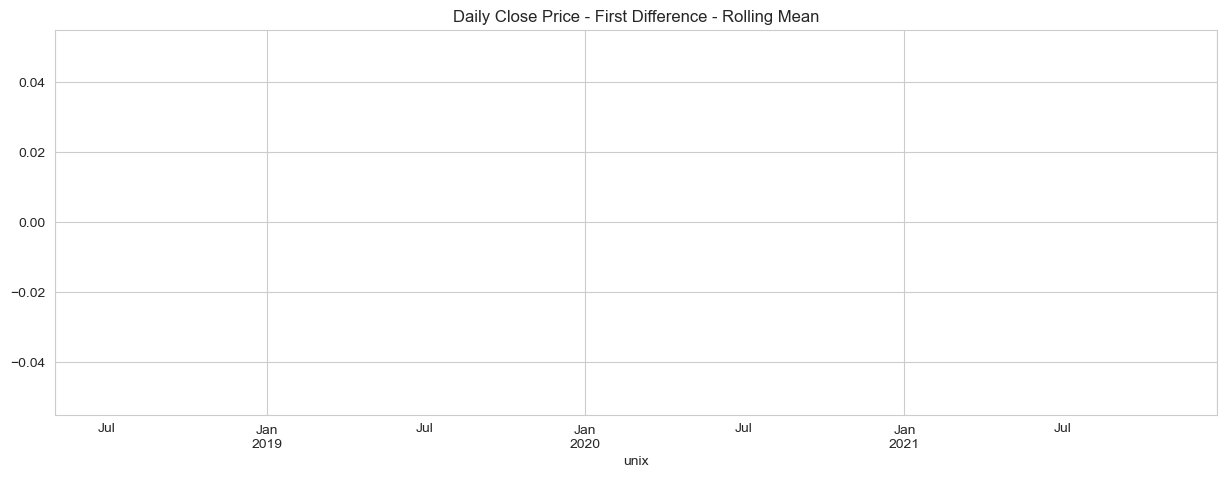

In [54]:
# Our data is now stationary and we can use ARIMA
# But first create custom train/test split function using a cutoff date
def train_test_split(df, cutoff_date):
    train = df[df.index < cutoff_date]
    test = df[df.index >= cutoff_date]
    return train, test

# An ideal cutoff date should be where the data starts to become stationary ie
# the rolling mean and standard deviation become constant
# So we check the rolling mean and standard deviation again
df_daily['close_diff'].rolling(7).mean().plot(figsize=(15, 5), title='Daily Close Price - First Difference - Rolling Mean')

In [57]:
# Add a date to our adf test function to find the cutoff date
def adf_test(series, title=''):
    print('********************************************')
    print(f'Results of Dickey-Fuller Test: {title}')
    print('********************************************')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '# Lags Used', '# Observations']
    out = pd.Series(result[0:4], index=labels)
    for key, val in result[4].items():
        out[f'Critical Value ({key})'] = val
    print(out.to_string())
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis')
        print('Reject the null hypothesis')
        print('Data has no unit root and is stationary')
    else:
        print('Weak evidence against the null hypothesis')
        print('Fail to reject the null hypothesis')
        print('Data has a unit root and is non-stationary')
    print('\n')
    print('Augmented Dickey-Fuller Test on "close_diff"')
    print('--------------------------------------------')
    print(f'Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f'Significance Level    = 0.05')
    print(f'Test Statistic        = {round(result[0], 4)}')
    print(f'No. Lags Chosen       = {result[2]}')

    for key, val in result[4].items():
        print(f'Critical value {round(float(key[:-1]), 3)}% = {round(val, 3)}')

    if result[0] < result[4]["5%"]:
        print("Reject the Null Hypothesis")
        print("Data is Stationary")
    else:
        print("Fail to Reject the Null Hypothesis")
        print("Data is Non-Stationary")

# Test the stationarity of the data
adf_test(df_daily['close_diff'].dropna(), title='Daily Close Price - First Difference')

********************************************
Results of Dickey-Fuller Test: Daily Close Price - First Difference
********************************************
ADF Test Statistic     -6.537635e+00
p-value                 9.520466e-09
# Lags Used             1.200000e+01
# Observations          3.600000e+02
Critical Value (1%)    -3.448646e+00
Critical Value (5%)    -2.869602e+00
Critical Value (10%)   -2.571065e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


Augmented Dickey-Fuller Test on "close_diff"
--------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level    = 0.05
Test Statistic        = -6.5376
No. Lags Chosen       = 12
Critical value 1.0% = -3.449
Critical value 5.0% = -2.87
Critical value 10.0% = -2.571
Reject the Null Hypothesis
Data is Stationary


In [68]:
# We can check the date by looking at the index ie
# Using code
#df_daily['close_diff'].rolling(7).mean().index
# It returns a datetimeindex so I have to select cutoff date using datetime

# Set cutoff date
cutoff_date = '2020-06-01'

In [69]:
# Now we can create our train/test split
train, test = train_test_split(df_daily['close_diff'], cutoff_date)

In [70]:
print(train.shape)
print(test.shape)

(760,)
(574,)


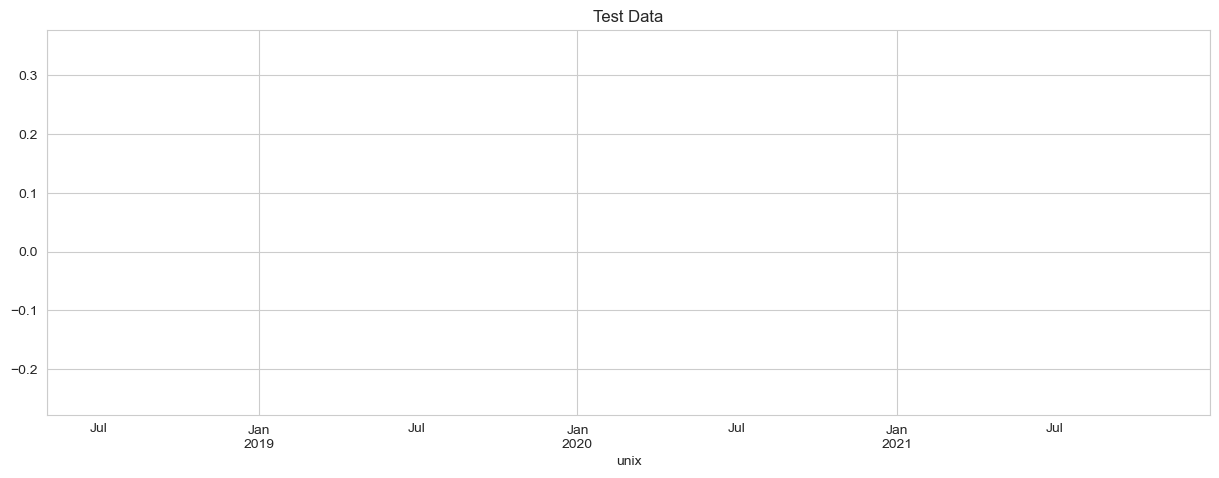

In [71]:
# Plot train and test data
train.plot(figsize=(15, 5), title='Train Data')
test.plot(figsize=(15, 5), title='Test Data');

In [72]:
# ARIMA
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(1, 1, 1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             close_diff   No. Observations:                  760
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 534.452
Date:                Mon, 12 Jun 2023   AIC                          -1062.904
Time:                        02:08:41   BIC                          -1049.008
Sample:                    05-03-2018   HQIC                         -1057.553
                         - 05-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2111      0.515     -0.410      0.682      -1.221       0.798
ma.L1         -0.9699      0.024    -40.486      0.000      -1.017      -0.923
sigma2         0.0003   6.97e-05      4.554      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             13291.84
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.37   Skew:                             0.58
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

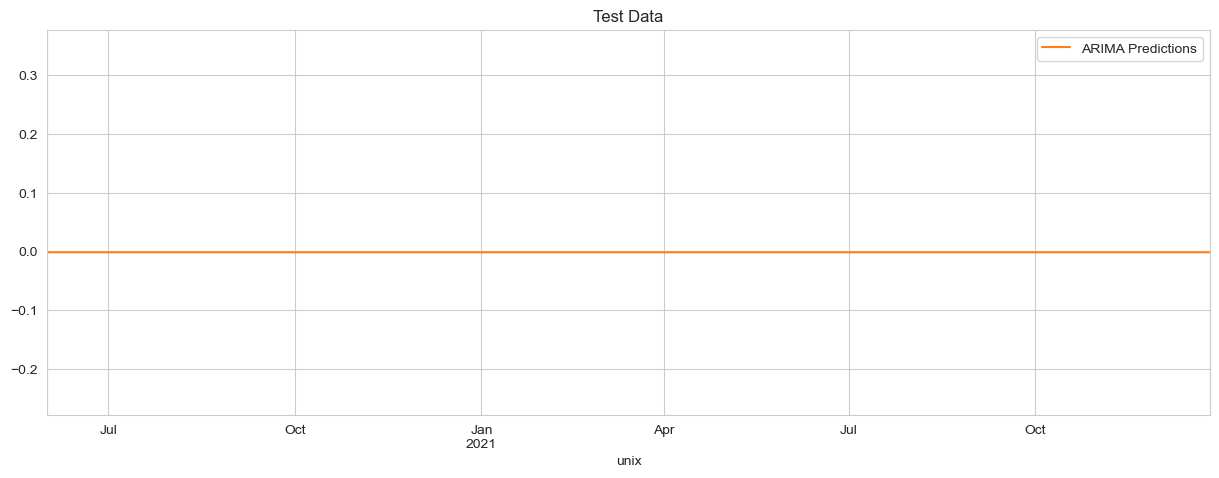

In [73]:
# Forecast
start = len(train)
end = len(train) + len(test) - 1

predictions = results.predict(start=start, end=end, typ='levels').rename('ARIMA Predictions')

# Plot predictions against test data
test.plot(figsize=(15, 5), title='Test Data')
predictions.plot(legend=True);